In [1]:
import warnings
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from my_python.filefinder import helper

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = helper.stat_display()
data = helper.sklearn_data

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [4]:
print(f'Number of the outcome variable: {len(np.unique(data.target))}.' 
      f'Possible values: {np.unique(data.target)} Labels: {(data.target_names)}')

Number of the outcome variable: 2.Possible values: [0 1] Labels: ['malignant' 'benign']


In [5]:
print(f'Observations: {data.data.shape[0]}, features: {data.feature_names.shape}')

Observations: 569, features: (30,)


In [6]:
# importing the transformed dataframe from finder 
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
# making the columns as features and investigate at the same time whether they have multicollinearity or not (high correlation)
columns = df.columns.to_list()[:10]
columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [8]:
features = helper.custom_corr(df)

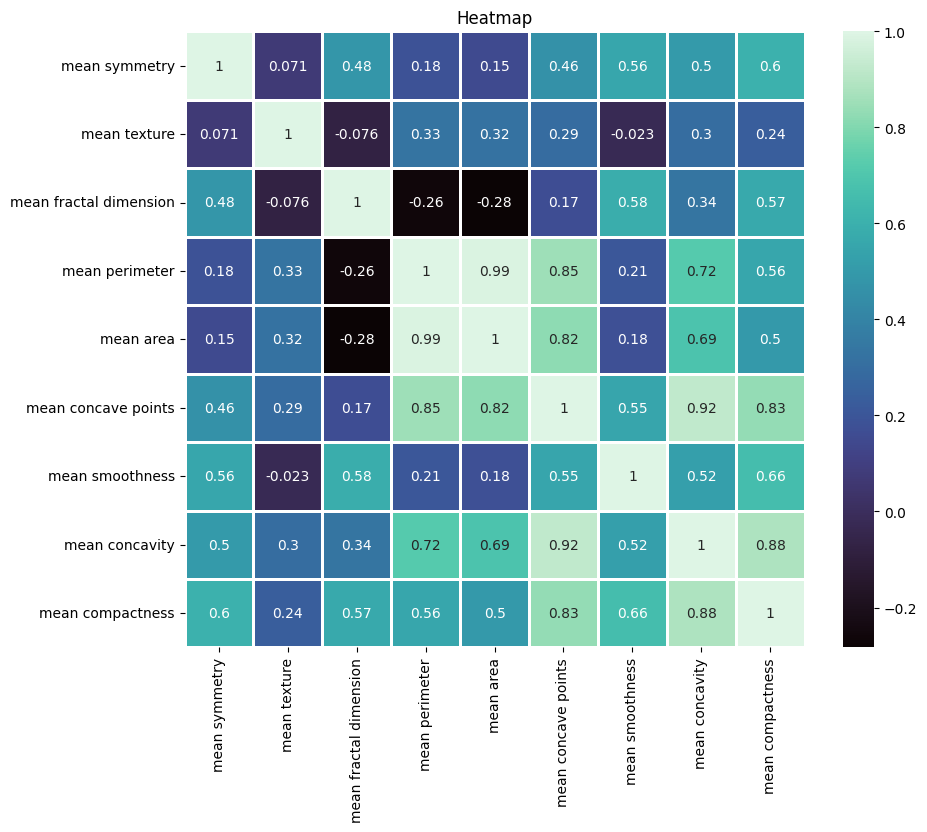

<Figure size 640x480 with 0 Axes>

In [9]:
# importing the helper file
helper.custom_heat(df, features)

In [10]:
# making X and y as predictor(df for the first run) and outcome(one D array) variables to the model
X = df[features]
y = data.target
type(X), type(y)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [11]:
a, b = np.sum(y == 0), np.sum(y == 1)
print(f'Malingnant tumors number: {a}, benign tumors number: {b}')
print(f'The sample is imbalanced, the benign tumors (true positivity) rate is {b/(b+a):.2}')

Malingnant tumors number: 212, benign tumors number: 357
The sample is imbalanced, the benign tumors (true positivity) rate is 0.63


In [12]:
min_class_size = min(a, b)
# At a maximum, there should be no more than the smallest class size divided by 10 number of features.
max_features = min_class_size / 10
print(f'Maximum features could be {round(max_features)}, the current number of predictor variables is {len(X.columns)}.'
      f'The statement that the sample is big enough is {max_features > X.columns.nunique()}')

Maximum features could be 21, the current number of predictor variables is 9.The statement that the sample is big enough is True


In [13]:
# making a pairplot just for fun
helper.custom_pair(X)

<Figure size 1000x800 with 0 Axes>

In [ ]:
X.head(3)

,mean concavity,mean smoothness,mean symmetry,mean fractal dimension,mean compactness,mean texture,mean concave points,mean perimeter,mean area
0,0.3001,0.11840,0.2419,0.07871,0.27760,10.38,0.14710,122.8,1001.0
1,0.0869,0.08474,0.1812,0.05667,0.07864,17.77,0.07017,132.9,1326.0
2,0.1974,0.10960,0.2069,0.05999,0.15990,21.25,0.12790,130.0,1203.0


In [ ]:
#np.mean(X['mean radius'])

In [ ]:
# standardizing the X values by initalizing the StandardScaler then fit and transform the dataframe (X) back into a 2D array
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
X = scaler.transform(X)
X

array([[ 2.65287398e+00,  1.56846633e+00,  2.21751501e+00, ...,
         2.53247522e+00,  1.26993369e+00,  9.84374905e-01],
       [-2.38458552e-02, -8.26962447e-01,  1.39236330e-03, ...,
         5.48144156e-01,  1.68595471e+00,  1.90870825e+00],
       [ 1.36347845e+00,  9.42210440e-01,  9.39684817e-01, ...,
         2.03723076e+00,  1.56650313e+00,  1.55888363e+00],
       ...,
       [ 4.65875327e-02, -8.40483881e-01, -8.09117071e-01, ...,
         1.05777359e-01,  6.72675785e-01,  5.77952641e-01],
       [ 3.29694400e+00,  1.52576706e+00,  2.13719425e+00, ...,
         2.65886573e+00,  1.98252415e+00,  1.73521799e+00],
       [-1.11487284e+00, -3.11208479e+00, -8.20069901e-01, ...,
        -1.26181958e+00, -1.81438851e+00, -1.34778924e+00]])

In [ ]:
np.mean(X[:,0])

-2.997016811641899e-16

In [ ]:
type(X), type(y), X.shape, y.shape

(numpy.ndarray, numpy.ndarray, (569, 9), (569,))

In [ ]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [ ]:
c, d, e, f = np.sum(y_train == 1), np.sum(y_train == 0), np.sum(y_test == 1), np.sum(y_test == 0)
f'The train true positivity rate is {c/(c+d):.2}, the test true positivity rate is {e/(e+f):.2}'

'The train true positivity rate is 0.62, the test true positivity rate is 0.65'

In [ ]:
# making a LogisticRegression model, fit the training X and y values and then predict y values with using test x values
lrm = LogisticRegression(penalty=None, fit_intercept=True, class_weight='balanced')
model = lrm.fit(X_train, y_train)

In [ ]:
threshold = 0.9
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = np.where(y_pred_proba > threshold, 1, 0)
y_test, y_pred

(array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]),
 array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0

In [ ]:
tp, tn, fp, fn = 0, 0, 0, 0

for i in range(len(y_test)):
  if y_test[i] == 1 and y_pred[i] == 1:
    tp += 1
  elif y_test[i] == 0 and y_pred[i] == 0:
    tn += 1
  elif y_test[i] == 0 and y_pred[i] == 1:
    fp += 1
  else:
    fn +=1
print(tp, tn, fp, fn)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

80 58 1 32
[[58  1]
 [32 80]]


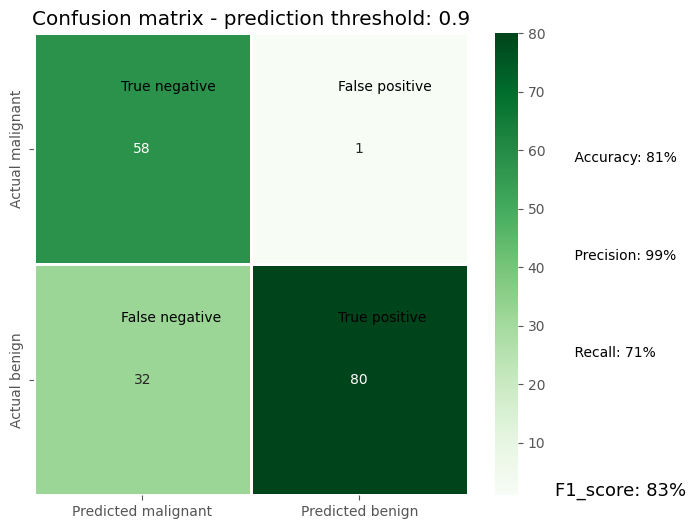

<Figure size 640x480 with 0 Axes>

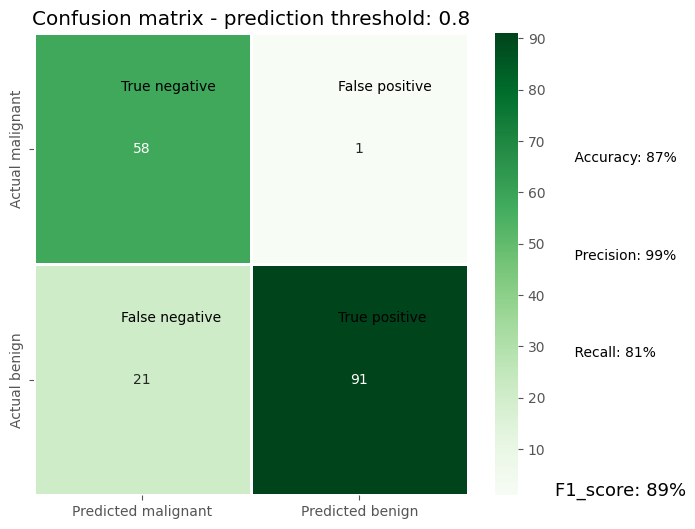

<Figure size 640x480 with 0 Axes>

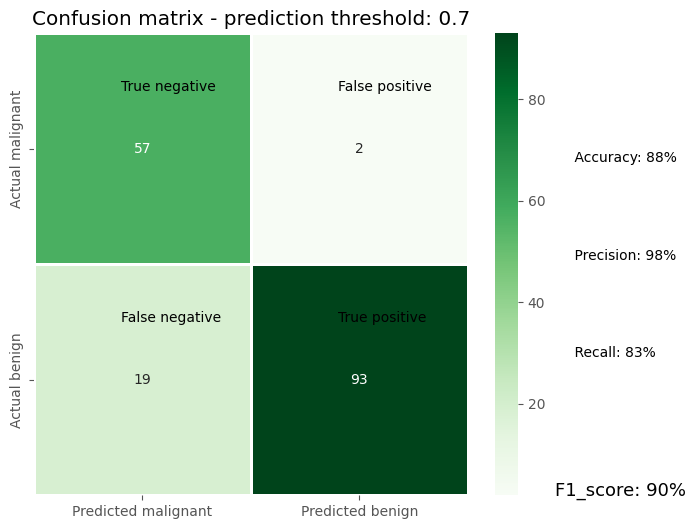

<Figure size 640x480 with 0 Axes>

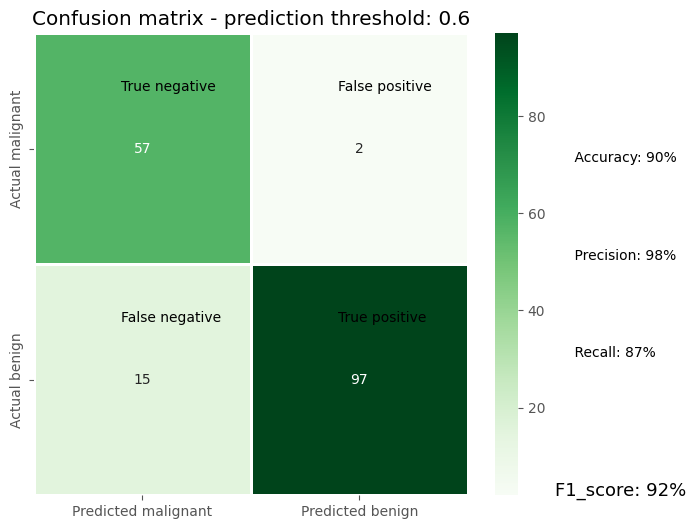

<Figure size 640x480 with 0 Axes>

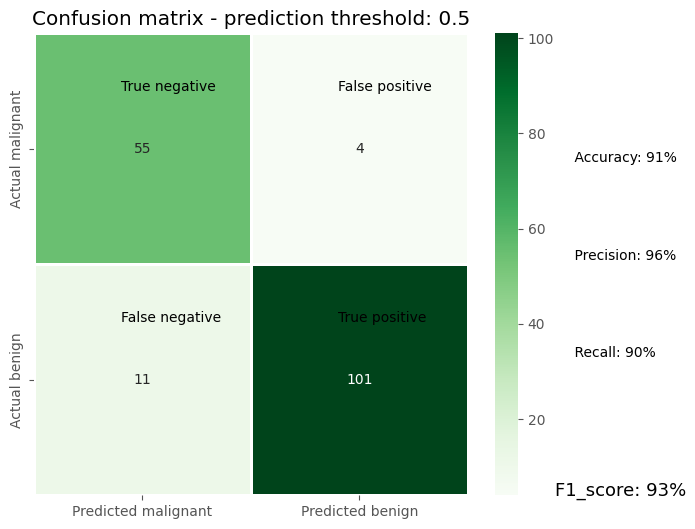

<Figure size 640x480 with 0 Axes>

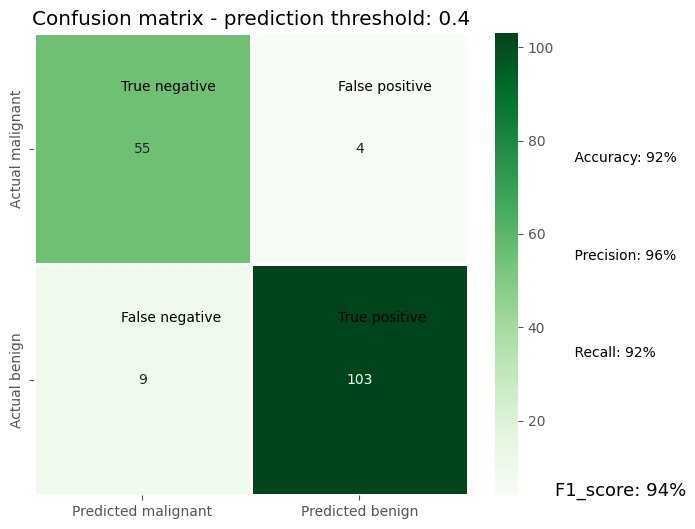

<Figure size 640x480 with 0 Axes>

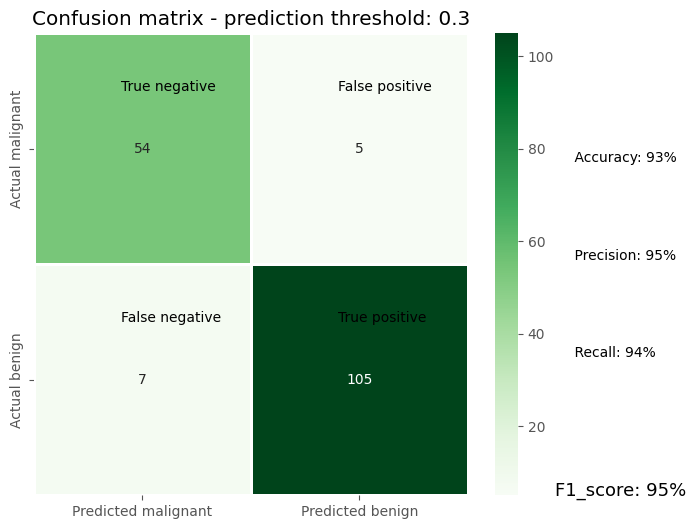

<Figure size 640x480 with 0 Axes>

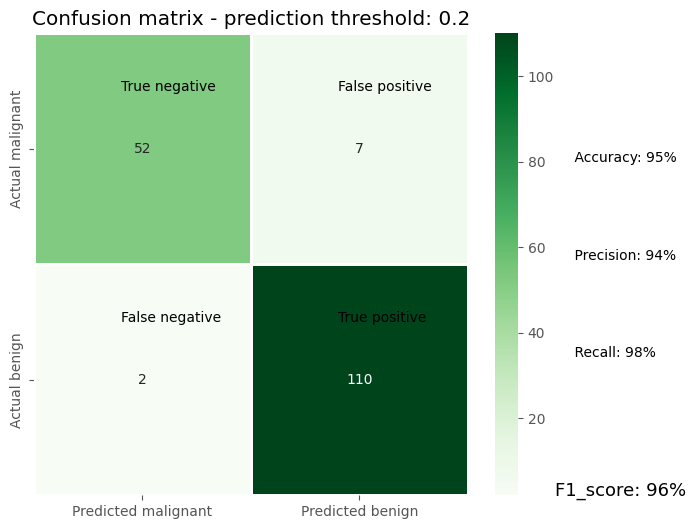

<Figure size 640x480 with 0 Axes>

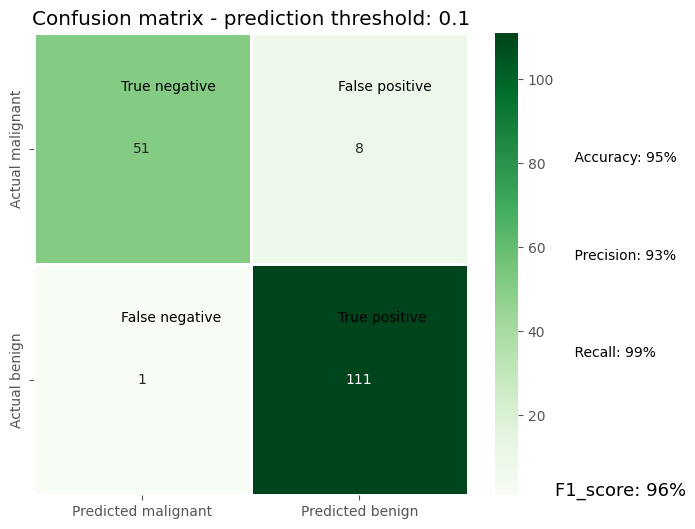

<Figure size 640x480 with 0 Axes>

In [ ]:
helper.custom_confusion(model, X_test=X_test, y_test=y_test)

### Conclusion: 
``We can see that how using lower prediction threshold changes the results. If our goal is to minimalize the false negatives and the false positives at the same time in a way that their coefficient will be close to 1 that would be a good idea. With this solution we can avoid to mistreat people with malignant tumor while they have benign (False negatives, left bottom corner) or at least decrease the occurences of that, while controlling the false positives (minimalize the number of patitent who has malignant but we predicted benign) can increase the model precision rate which in this case is important. With this in mind the chosen threshold must be somewhere between 0.2 and 0.3 where the precision rate and the recall rate are the closest to each other.``

``This is a malignant-benign breast cancer prediction model based on those predictor features using the LogisticRegression algorithm and showing that the prediction threshold has to be chosen depending on the goals we achieve. If we want to save as many lives as possible we should maximize the precision score (as to minimize the FP ) not the number of False negatives. In this case, we should choose 0.6 as the threshold. If we want to maximalize both the recall and the precision scores at the same time we should choose 0.3 as the prediction threshold.``

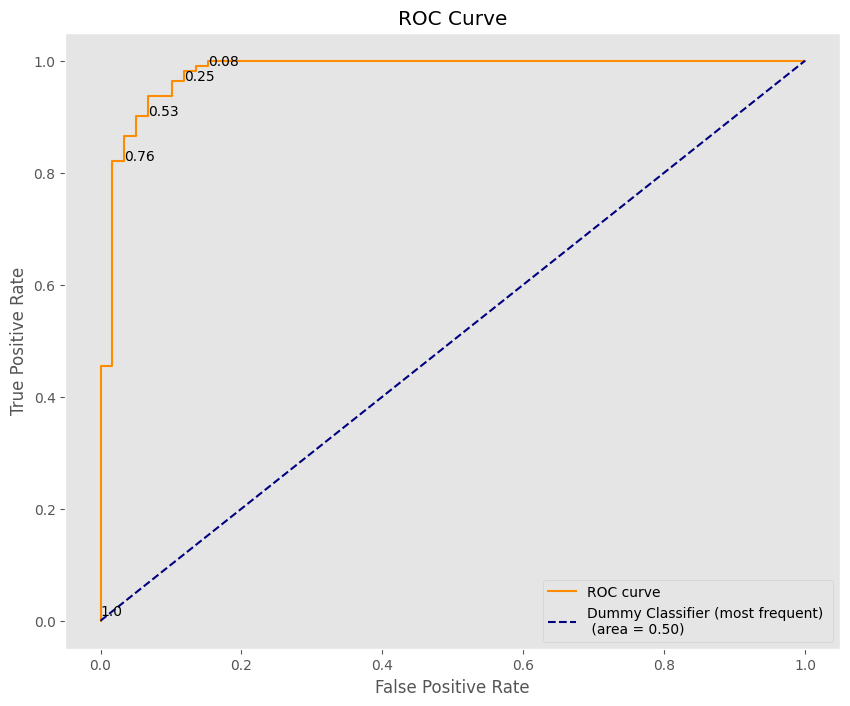

In [ ]:
helper.custom_roc(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

In [ ]:
scores_and_k = []
accuracies = []

for k in range(1, 101):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  a = classifier.score(X_test, y_test)
  scores_and_k.append([a, k])
  accuracies.append(a)
print(max(scores_and_k))

[0.9532163742690059, 29]


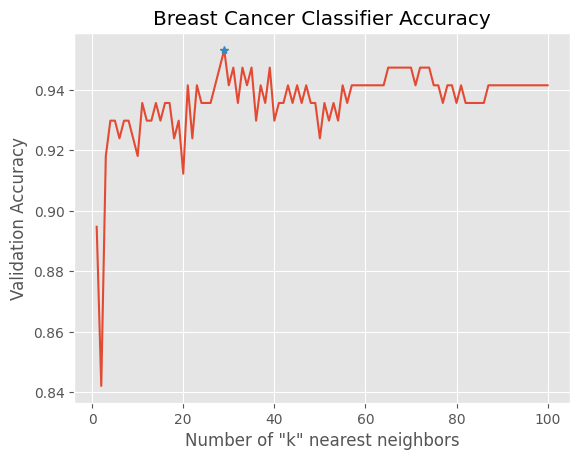

<Figure size 640x480 with 0 Axes>

In [ ]:
helper.k_nearest_neigh(list(range(1, 101)), list_of_accuracy=accuracies, scores_and_k=scores_and_k)

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01,criterion='gini')
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

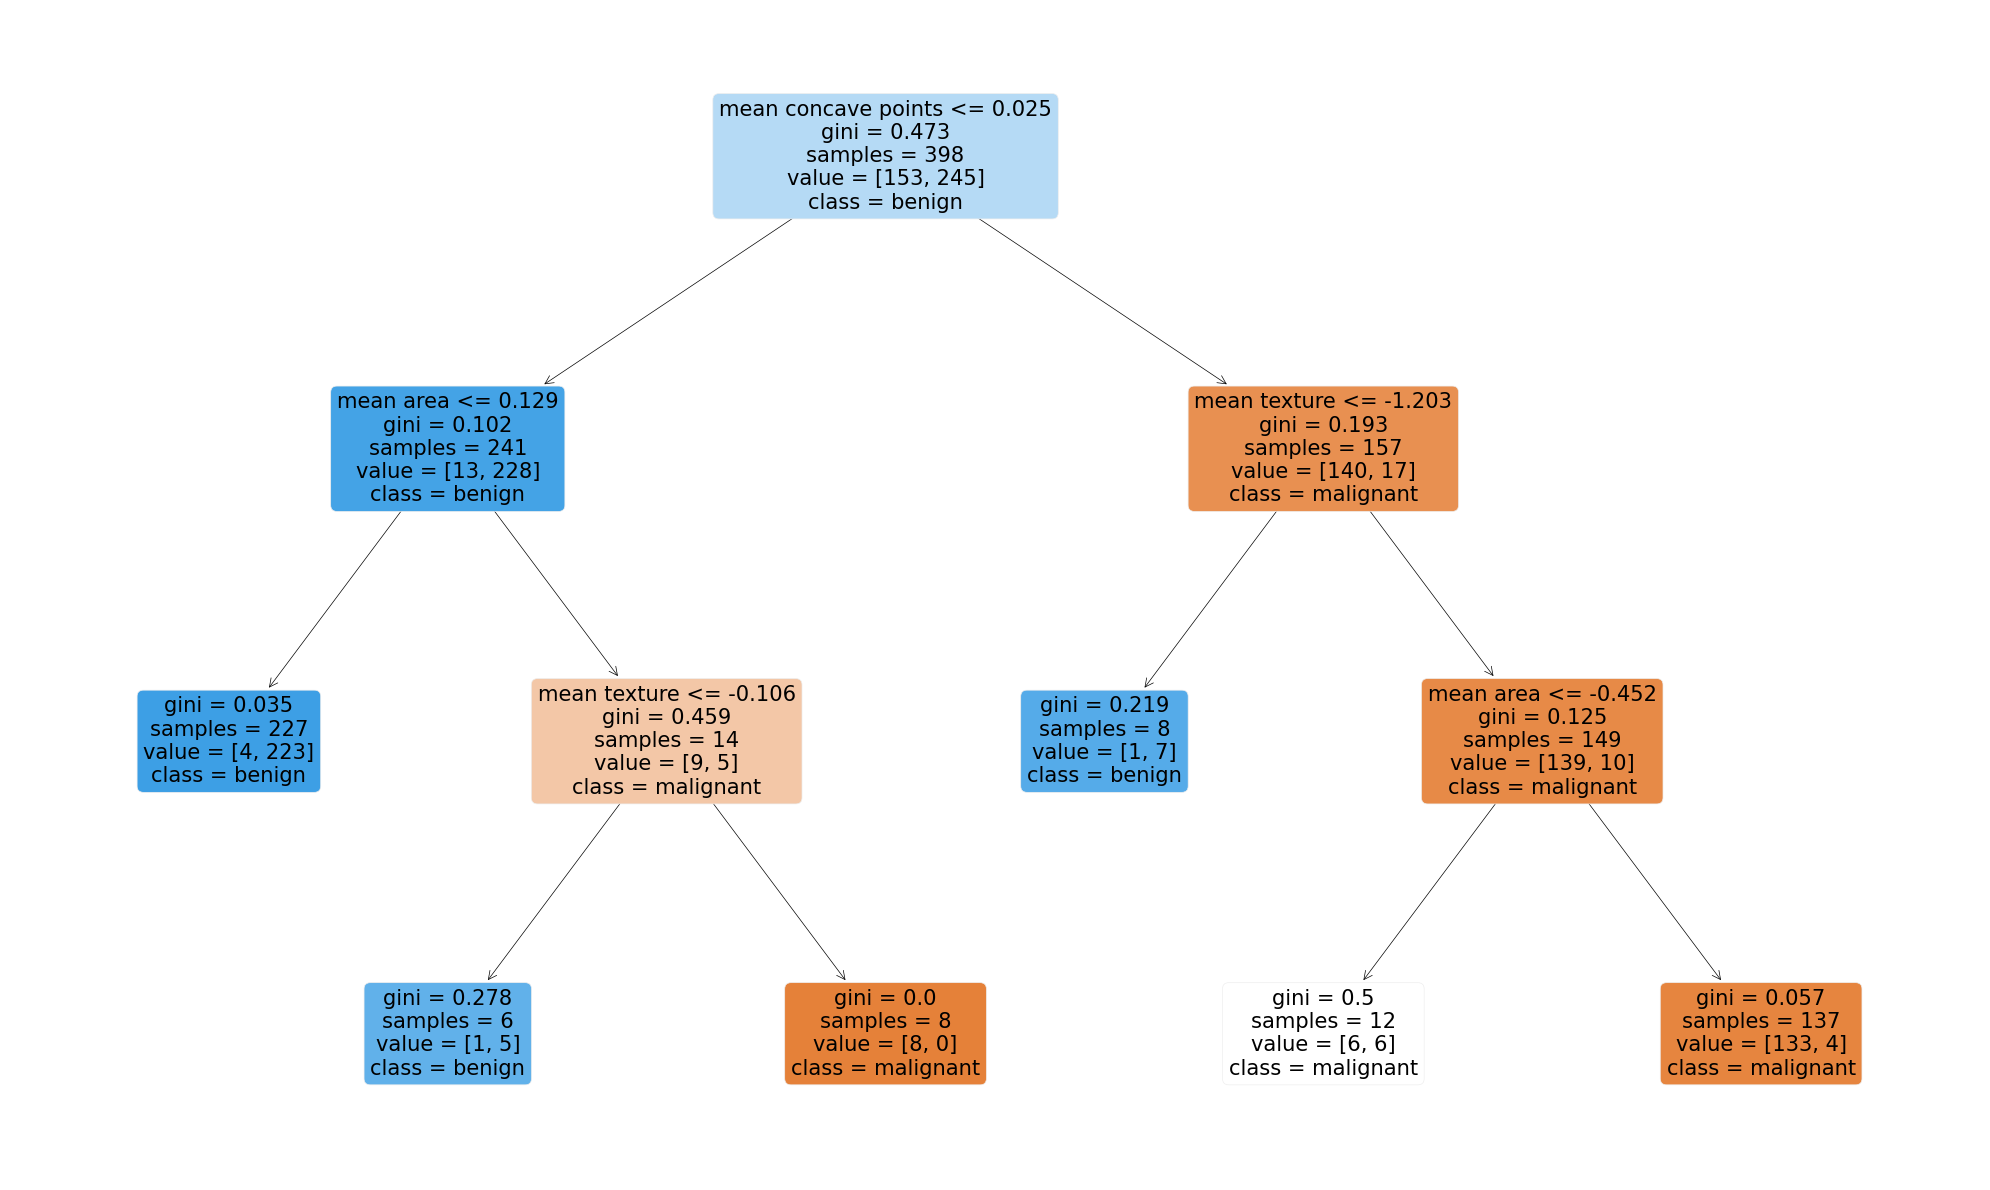

In [ ]:
plt.figure(figsize=(20, 12))
tree.plot_tree(dt, feature_names= features, max_depth=5, class_names = ['malignant', 'benign'], label='all', filled=True, rounded=True)
plt.tight_layout()
plt.show()